In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



In [6]:
# Load dataset
df = pd.read_csv("data.csv")

# Drop ID (not useful)
df = df.drop(columns=["id"])

# Encode diagnosis (M=1, B=0)
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

# Split features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree Model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)
# Model သင်ယူမှု ပြီးဆုံးကြောင်း ပြသခြင်း

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,           # Tree ၏ အလွှာအနက်ကို ၅ ထပ်အထိပဲ ကန့်သတ်ခြင်း 
    min_samples_split=100,  # အချက်အလက် အနည်းဆုံး ၁၀0 ခုရှိမှသာ အကိုင်းအခက် ဆက်ခွဲရန် သတ်မှတ်ခြင်း
    random_state=42        # ရလဒ် တည်ငြိမ်စေရန်အတွက် random state သတ်မှတ်ခြင်း
)

# Training Data (X_train, y_train) ကို သုံးပြီး Model ကို train ခြင်း
dt_model.fit(X_train, y_train)

print("Model training complete!") 

Model training complete!


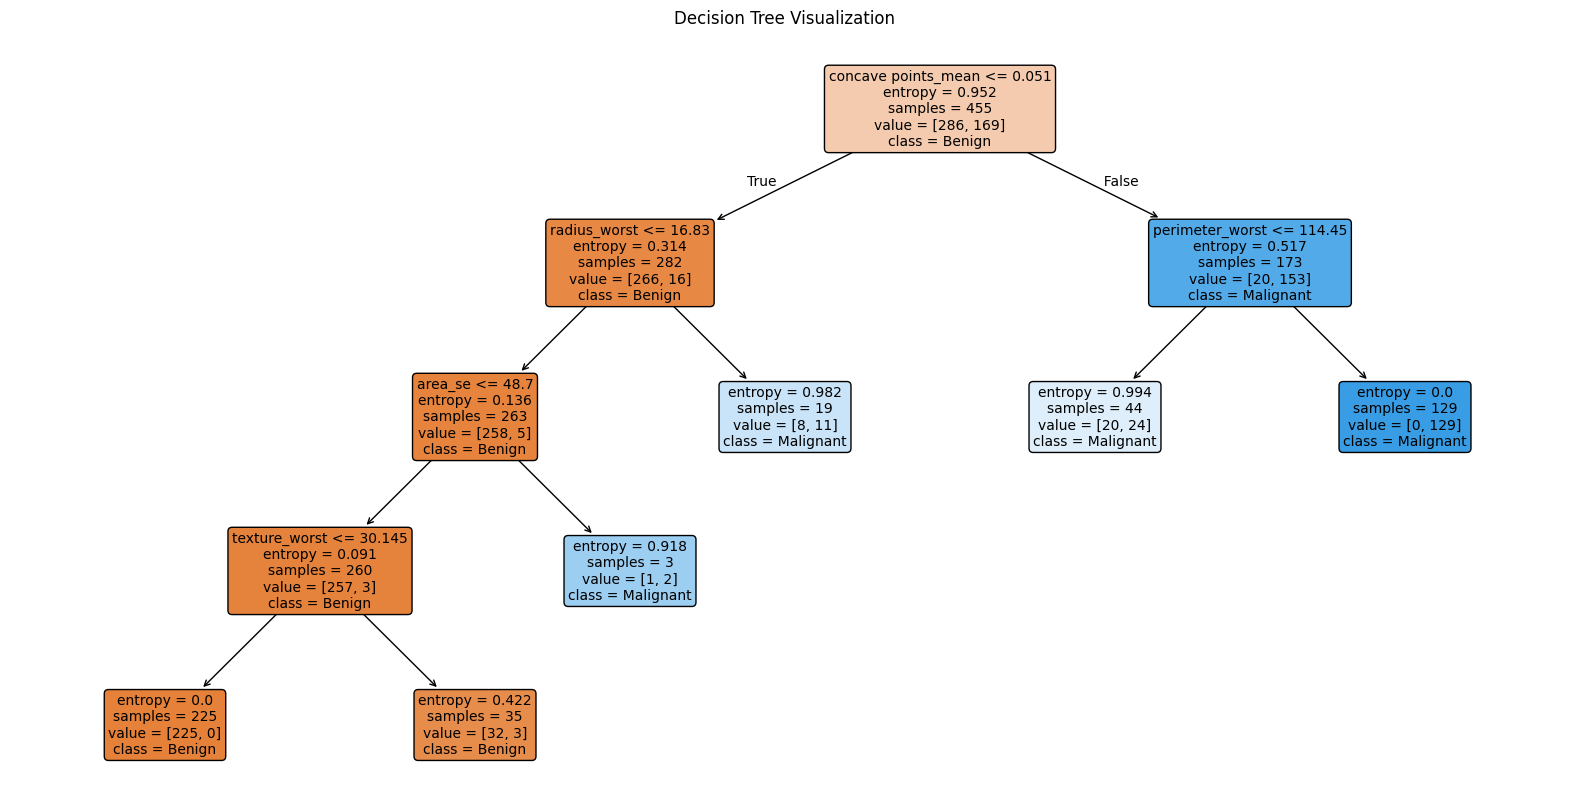

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a large figure for better readability
plt.figure(figsize=(20, 10))

# Plot the Decision Tree
plot_tree(
    dt_model,
    feature_names=X_train.columns,  # show feature names
    class_names=["Benign", "Malignant"],  # change if your labels are 0/1
    filled=True,        # color nodes based on class
    rounded=True,       # rounded boxes
    fontsize=10
)

# Show the tree
plt.title("Decision Tree Visualization")
plt.show()

In [8]:
import pandas as pd

# Feature names (same order as training data)
feature_names = X_train.columns

# Get feature importance from trained Decision Tree
importances = dt_model.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort by highest importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

print(feature_importance_df)

                    Feature  Importance
7       concave points_mean    0.722198
22          perimeter_worst    0.129227
20             radius_worst    0.097023
13                  area_se    0.026504
21            texture_worst    0.025048
3                 area_mean    0.000000
0               radius_mean    0.000000
6            concavity_mean    0.000000
5          compactness_mean    0.000000
9    fractal_dimension_mean    0.000000
8             symmetry_mean    0.000000
10                radius_se    0.000000
4           smoothness_mean    0.000000
1              texture_mean    0.000000
2            perimeter_mean    0.000000
14            smoothness_se    0.000000
12             perimeter_se    0.000000
11               texture_se    0.000000
15           compactness_se    0.000000
18              symmetry_se    0.000000
17        concave points_se    0.000000
16             concavity_se    0.000000
19     fractal_dimension_se    0.000000
23               area_worst    0.000000


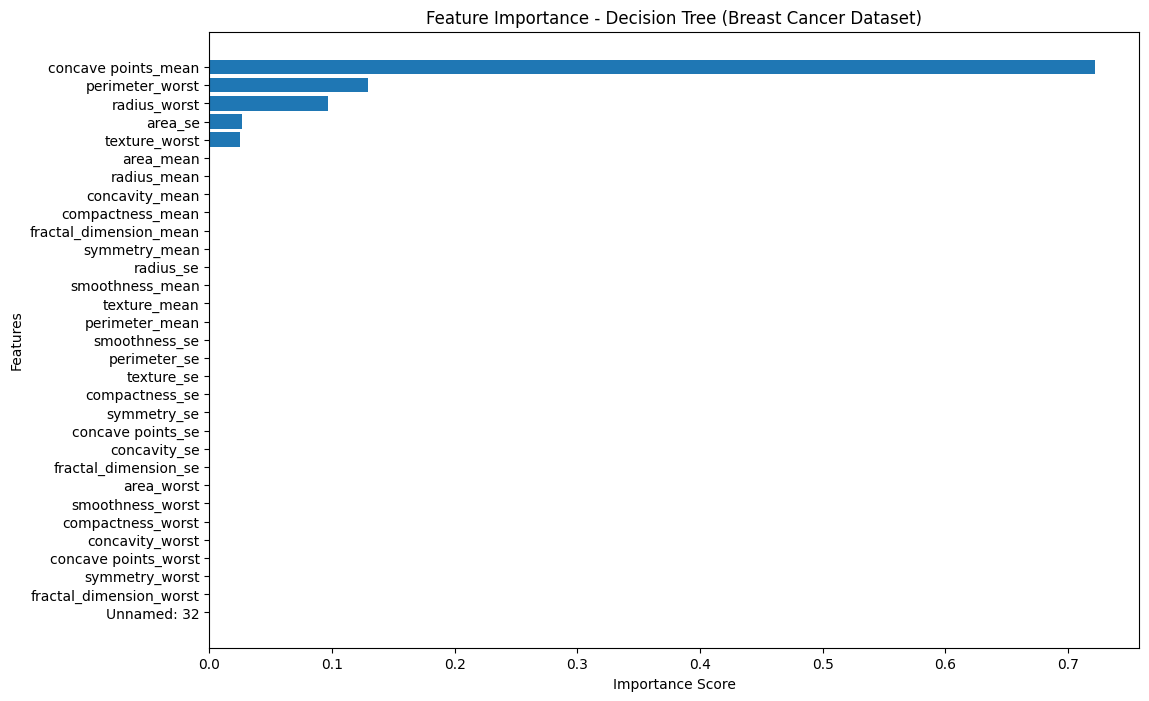

In [9]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Decision Tree (Breast Cancer Dataset)")
plt.gca().invert_yaxis()  # highest importance on top
plt.show()

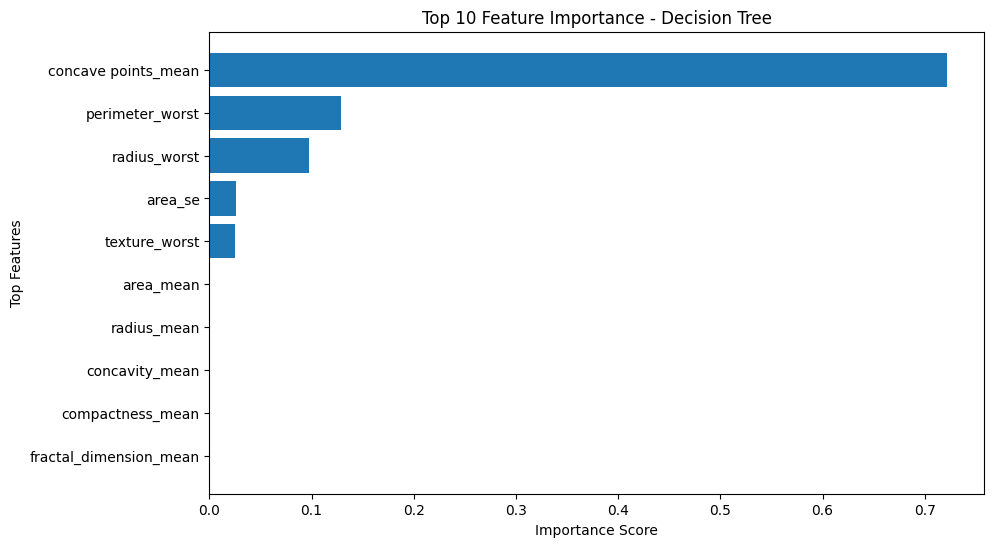

In [10]:
# Select top 10 important features
top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features["Feature"], top_features["Importance"])
plt.xlabel("Importance Score")
plt.ylabel("Top Features")
plt.title("Top 10 Feature Importance - Decision Tree")
plt.gca().invert_yaxis()
plt.show()

In [11]:
feature_importance_df["Importance (%)"] = (
    feature_importance_df["Importance"] * 100
)
print(feature_importance_df.head(10))

                   Feature  Importance  Importance (%)
7      concave points_mean    0.722198       72.219801
22         perimeter_worst    0.129227       12.922741
20            radius_worst    0.097023        9.702312
13                 area_se    0.026504        2.650362
21           texture_worst    0.025048        2.504784
3                area_mean    0.000000        0.000000
0              radius_mean    0.000000        0.000000
6           concavity_mean    0.000000        0.000000
5         compactness_mean    0.000000        0.000000
9   fractal_dimension_mean    0.000000        0.000000


In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

# အဖြေမှန် (y_test) နှင့် ခန့်မှန်းချက် (y_pred) မည်မျှ ကိုက်ညီသလဲ (Accuracy) ကို တွက်ချက်ခြင်း
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}") 

Accuracy: 0.9386
